# Multiple_Input_Lstm
- developer: mehdi sahraei
- [link github](https://github.com/mehdisahraeei)

### Importing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow as tf
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

### Reading df

In [3]:
df = pd.read_csv('BTC-USD.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-22,36471.589844,36688.812500,34349.250000,35030.250000,35030.250000,39714385405
2022-01-23,35047.359375,36433.312500,34784.968750,36276.804688,36276.804688,26017975951
2022-01-24,36275.734375,37247.519531,33184.058594,36654.328125,36654.328125,41856658597
2022-01-25,36654.804688,37444.570313,35779.429688,36954.003906,36954.003906,26428189594
2022-01-26,36950.515625,38825.410156,36374.906250,36852.121094,36852.121094,31324598034


- dropping

In [4]:
df = df.drop(['Adj Close','Volume','Low'], axis=1)
df.head()

,Open,High,Close
Date,,,
2022-01-22,36471.589844,36688.812500,35030.250000
2022-01-23,35047.359375,36433.312500,36276.804688
2022-01-24,36275.734375,37247.519531,36654.328125
2022-01-25,36654.804688,37444.570313,36954.003906
2022-01-26,36950.515625,38825.410156,36852.121094


In [5]:
dataset = df.values
dataset = dataset.astype('float64')
dataset[:5]

array([[36471.589844, 36688.8125  , 35030.25    ],
       [35047.359375, 36433.3125  , 36276.804688],
       [36275.734375, 37247.519531, 36654.328125],
       [36654.804688, 37444.570313, 36954.003906],
       [36950.515625, 38825.410156, 36852.121094]])

### plotting data

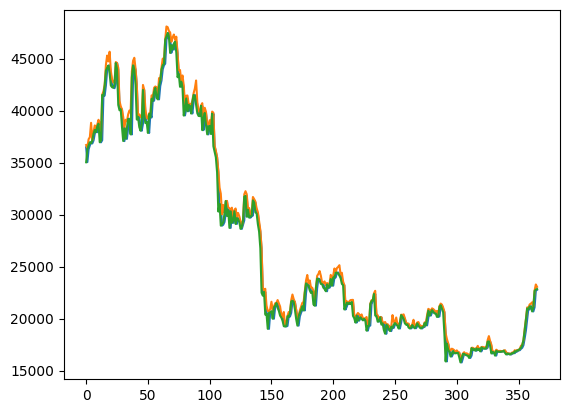

In [6]:
plt.plot(dataset)
plt.show()

### normalizing data

In [7]:
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)
print(dataset[:5],'\n')
print(dataset.shape)

[[0.65318238 0.64195202 0.60744664]
 [0.60821794 0.63392596 0.64679689]
 [0.64699902 0.65950278 0.65871425]
 [0.65896666 0.66569277 0.66817418]
 [0.66830256 0.70906931 0.66495802]] 

(366, 3)


### Method for making data and timestep

In [8]:
# lookback -> timestep
def create_dataset(dataset,look_back):
    data_x, data_y = [],[] #data_x is data and data_y is label
    for i in range(len(dataset)-look_back-1): #we want if data be beyond len(sequendatasetce), the command will not continue
        data_x.append(dataset[i:(i+look_back),:])
        data_y.append(dataset[i+look_back,:])
    return np.array(data_x) , np.array(data_y)

### split dataset

In [9]:
train_size = int(len(dataset) * 0.80)
train , test = dataset[0:train_size,:] , dataset[train_size:len(dataset),:]
print(train.shape)
print(test.shape)

(292, 3)
(74, 3)


In [10]:
train[:5]

array([[0.65318238, 0.64195202, 0.60744664],
       [0.60821794, 0.63392596, 0.64679689],
       [0.64699902, 0.65950278, 0.65871425],
       [0.65896666, 0.66569277, 0.66817418],
       [0.66830256, 0.70906931, 0.66495802]])

### Making data train & test x,y

In [11]:
n_steps = 3 #timestep or look_up

train_x , train_y = create_dataset(train, n_steps)
test_x , test_y = create_dataset(test, n_steps)

In [12]:
print(train_x.shape , train_y.shape)
print(test_x.shape , test_y.shape)

(288, 3, 3) (288, 3)
(70, 3, 3) (70, 3)


In [13]:
train_x[:2]

array([[[0.65318238, 0.64195202, 0.60744664],
        [0.60821794, 0.63392596, 0.64679689],
        [0.64699902, 0.65950278, 0.65871425]],

       [[0.60821794, 0.63392596, 0.64679689],
        [0.64699902, 0.65950278, 0.65871425],
        [0.65896666, 0.66569277, 0.66817418]]])

In [14]:
for i in range(len(train_x)):   
    print(train_x[i],train_y[i])

# print(train_x[:5],'\n')
# print(train_y[:5])

[[0.65318238 0.64195202 0.60744664]
 [0.60821794 0.63392596 0.64679689]
 [0.64699902 0.65950278 0.65871425]] [0.65896666 0.66569277 0.66817418]
[[0.60821794 0.63392596 0.64679689]
 [0.64699902 0.65950278 0.65871425]
 [0.65896666 0.66569277 0.66817418]] [0.66830256 0.70906931 0.66495802]
[[0.64699902 0.65950278 0.65871425]
 [0.65896666 0.66569277 0.66817418]
 [0.66830256 0.70906931 0.66495802]] [0.66487279 0.65638674 0.67398982]
[[0.65896666 0.66569277 0.66817418]
 [0.66830256 0.70906931 0.66495802]
 [0.66487279 0.65638674 0.67398982]] [0.67391999 0.68166035 0.69438531]
[[0.66830256 0.70906931 0.66495802]
 [0.66487279 0.65638674 0.67398982]
 [0.67391999 0.68166035 0.69438531]] [0.69451282 0.70124277 0.70555529]
[[0.66487279 0.65638674 0.67398982]
 [0.67391999 0.68166035 0.69438531]
 [0.69451282 0.70124277 0.70555529]] [0.70623209 0.69150715 0.69859226]
[[0.67391999 0.68166035 0.69438531]
 [0.69451282 0.70124277 0.70555529]
 [0.70623209 0.69150715 0.69859226]] [0.69891907 0.70347311 0.71

[[0.16019312 0.14460439 0.13205422]
 [0.132225   0.11906838 0.11164152]
 [0.11187741 0.12471041 0.13967825]] [0.13983338 0.14251671 0.15097444]
[[0.132225   0.11906838 0.11164152]
 [0.11187741 0.12471041 0.13967825]
 [0.13983338 0.14251671 0.15097444]] [0.15125229 0.15345947 0.1593842 ]
[[0.11187741 0.12471041 0.13967825]
 [0.13983338 0.14251671 0.15097444]
 [0.15125229 0.15345947 0.1593842 ]] [0.15949067 0.16527585 0.17055862]
[[0.13983338 0.14251671 0.15097444]
 [0.15125229 0.15345947 0.1593842 ]
 [0.15949067 0.16527585 0.17055862]] [0.17088584 0.16798481 0.15758537]
[[0.15125229 0.15345947 0.1593842 ]
 [0.15949067 0.16527585 0.17055862]
 [0.17088584 0.16798481 0.15758537]] [0.15784293 0.20041552 0.21144993]
[[0.15949067 0.16527585 0.17055862]
 [0.17088584 0.16798481 0.15758537]
 [0.15784293 0.20041552 0.21144993]] [0.21106973 0.23289453 0.23997861]
[[0.17088584 0.16798481 0.15758537]
 [0.15784293 0.20041552 0.21144993]
 [0.21106973 0.23289453 0.23997861]] [0.24028373 0.24953896 0.23

[[0.11480087 0.10637856 0.11859309]
 [0.11881101 0.10521554 0.09796897]
 [0.09815381 0.10748275 0.08712915]] [0.08689454 0.10064345 0.1144711 ]
[[0.11881101 0.10521554 0.09796897]
 [0.09815381 0.10748275 0.08712915]
 [0.08689454 0.10064345 0.1144711 ]] [0.11460602 0.10088727 0.11081208]
[[0.09815381 0.10748275 0.08712915]
 [0.08689454 0.10064345 0.1144711 ]
 [0.11460602 0.10088727 0.11081208]] [0.1109624  0.09603474 0.09942809]
[[0.08689454 0.10064345 0.1144711 ]
 [0.11460602 0.10088727 0.11081208]
 [0.1109624  0.09603474 0.09942809]] [0.09957537 0.09052283 0.09516923]
[[0.11460602 0.10088727 0.11081208]
 [0.1109624  0.09603474 0.09942809]
 [0.09957537 0.09052283 0.09516923]] [0.09539504 0.09492509 0.10844559]
[[0.1109624  0.09603474 0.09942809]
 [0.09957537 0.09052283 0.09516923]
 [0.09539504 0.09492509 0.10844559]] [0.10858983 0.12833557 0.10490611]
[[0.09957537 0.09052283 0.09516923]
 [0.09539504 0.09492509 0.10844559]
 [0.10858983 0.12833557 0.10490611]] [0.10488911 0.10791351 0.11

### Converting data to three-dimensional or three-channel
- The input must be three-dimensional or three-channel, that's why we reshape it


### training model

In [17]:
n_features = train_x.shape[2]
n_features

3

In [21]:
model = Sequential()
#return_sequences: When return_sequences parameter is True, it will output all the hidden states of each time steps
model.add(LSTM(120,activation = 'relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(120, activation = 'relu'))   

model.add(Dense(n_features)) #n-output  
model.compile(optimizer='adam',loss='mse')   

In [31]:
#verbose is the choice that how you want to see the output of your Nural Network while it's training. If you set verbose = 0, It will show nothing
model.fit(train_x, train_y, epochs=50, shuffle=False, batch_size=2)

Epoch 1/50
144/144 [==============================] - 3s 5ms/step - loss: 0.0861
Epoch 2/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0106
Epoch 3/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0092
Epoch 4/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0081
Epoch 5/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0072
Epoch 6/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0065
Epoch 7/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0060
Epoch 8/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0054
Epoch 9/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0054
Epoch 10/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0050
Epoch 11/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0052
Epoch 12/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0055
Epoch 13/50
144/144 [====

### saving model

In [32]:
model.save('savedata')

INFO:tensorflow:Assets written to: savedata/assets


INFO:tensorflow:Assets written to: savedata/assets


In [ ]:
# loading model
new_model = tf.keras.models.load_model('savedata')

### Testing model

In [33]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

3/3 [==============================] - 0s 4ms/step


In [34]:
# print('predicted y(train):', np.reshape(predict_train[:5],-1),'\n')

print('predicted y(train):', predict_train[:5],'\n')
print('real y(train):', train_y[:5])

predicted y(train): [[0.53084344 0.53590494 0.52209026]
 [0.53611255 0.5409069  0.5272776 ]
 [0.54435533 0.54878753 0.5353693 ]
 [0.54132247 0.54593974 0.53262246]
 [0.54969597 0.5539436  0.54064786]] 

real y(train): [[0.65896666 0.66569277 0.66817418]
 [0.66830256 0.70906931 0.66495802]
 [0.66487279 0.65638674 0.67398982]
 [0.67391999 0.68166035 0.69438531]
 [0.69451282 0.70124277 0.70555529]]


In [35]:
predict_train.shape
# train_y.shape

(288, 3)

In [36]:
predict_train = scaler.inverse_transform(predict_train)
trainy = scaler.inverse_transform(train_y)

predict_test = scaler.inverse_transform(predict_test)
testy = scaler.inverse_transform(test_y)

In [37]:
print(predict_train[:5])

[[32596.553 33312.93  32326.293]
 [32763.447 33472.164 32490.617]
 [33024.535 33723.03  32746.95 ]
 [32928.47  33632.375 32659.936]
 [33193.7   33887.168 32914.168]]


### creating df and plotting

In [38]:
Answer1 = pd.DataFrame({
    "Predicted": predict_train.ravel(),
    "real": trainy.ravel()
}) 
Answer1.head()

,Predicted,real
0,32596.552734,36654.804688
1,33312.929688,37444.570313
2,32326.292969,36954.003906
3,32763.447266,36950.515625
4,33472.164062,38825.410156


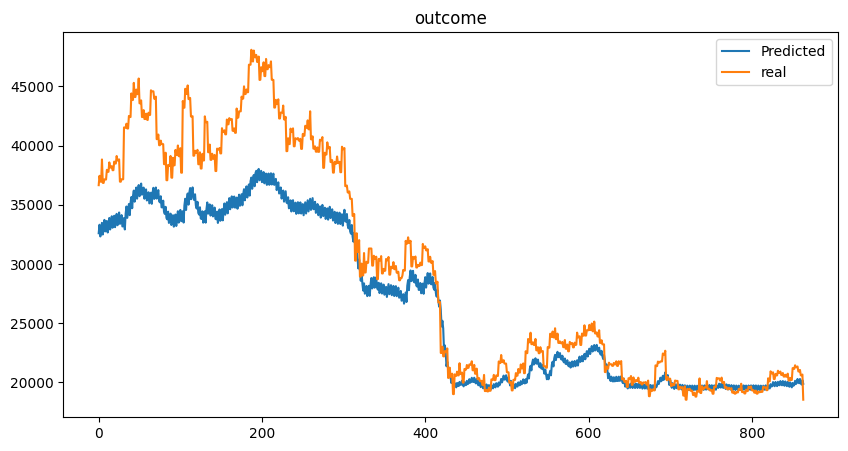

In [39]:
#train
Answer1.plot(title="outcome", figsize=(10,5));

In [ ]:
# xx2 = test_x.reshape(-1,1)
# xx2 = scaler.inverse_transform(xx2)
# xx2[:8]

In [40]:
Answer2 = pd.DataFrame({
    "Predicted": predict_test.ravel(),
    "real": testy.ravel()
}) 
Answer2.head()

,Predicted,real
0,19160.041016,16799.722656
1,19515.759766,16920.765625
2,19449.345703,16353.365234
3,19139.945312,16352.028320
4,19495.234375,17109.324219


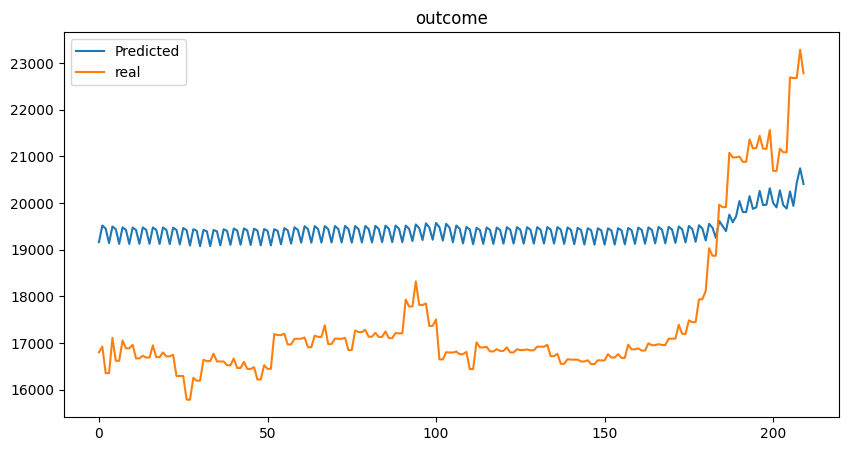

In [41]:
#test
Answer2.plot(title="outcome", figsize=(10,5));

### Evaluate the model

In [42]:
model.evaluate(test_x, test_y)

3/3 [==============================] - 0s 5ms/step - loss: 0.0056


0.0055680531077086926

In [44]:
train_score = math.sqrt(mean_squared_error(trainy,predict_train))
print('rmse ', train_score)
test_score = math.sqrt(mean_squared_error(test_y,predict_test))
print('rmse ', test_score)

rmse  4044.349061829224
rmse  19427.913084641415


### new testing
- we must change dim

In [45]:
test_x.shape , test_y.shape

((70, 3, 3), (70, 3))

In [46]:
test_ = array([[0.65318238, 0.64195202, 0.60744664],[0.60821794, 0.63392596, 0.64679689],[0.64699902, 0.65950278, 0.65871425]])
test_ = test_.reshape(1,n_steps,n_features)


print(test_.shape,'\n')
print(test_)

(1, 3, 3) 

[[[0.65318238 0.64195202 0.60744664]
  [0.60821794 0.63392596 0.64679689]
  [0.64699902 0.65950278 0.65871425]]]


In [47]:
y_hat = model.predict(test_)
y_hat

1/1 [==============================] - 0s 23ms/step


array([[0.53084344, 0.535905  , 0.52209026]], dtype=float32)

In [48]:
y_hat = scaler.inverse_transform(y_hat)
y_hat

array([[32596.553, 33312.934, 32326.293]], dtype=float32)